In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Advertising.csv")
df.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.shape

(200, 4)

In [7]:
numerical_summary = df.describe().transpose()
numerical_summary

count      mean        std  min     25%     50%      75%    max
TV         200.0  147.0425  85.854236  0.7  74.375  149.75  218.825  296.4
Radio      200.0   23.2640  14.846809  0.0   9.975   22.90   36.525   49.6
Newspaper  200.0   30.5540  21.778621  0.3  12.750   25.75   45.100  114.0
Sales      200.0   15.1305   5.283892  1.6  11.000   16.00   19.050   27.0

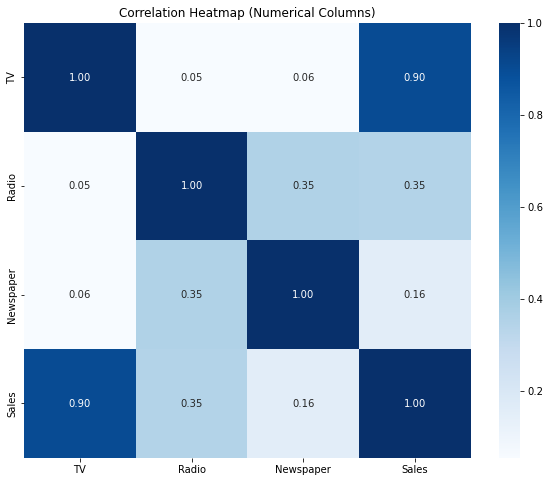

In [8]:
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_df = df[numerical_columns]
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()

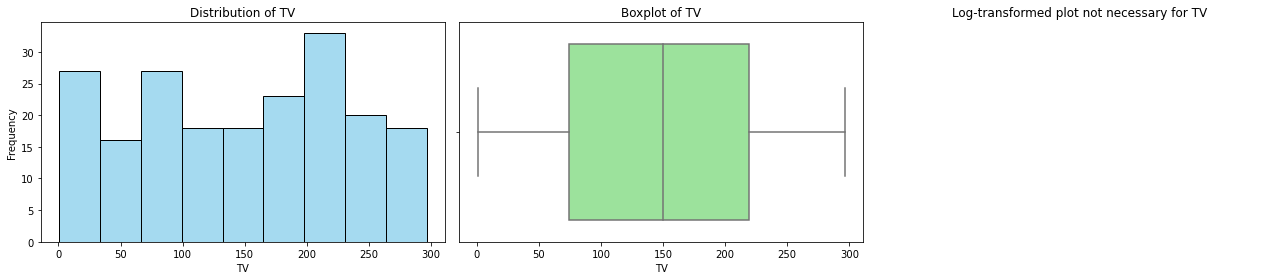

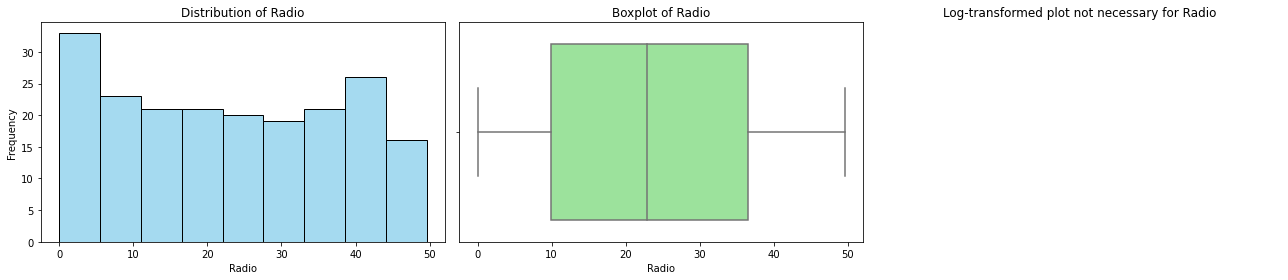

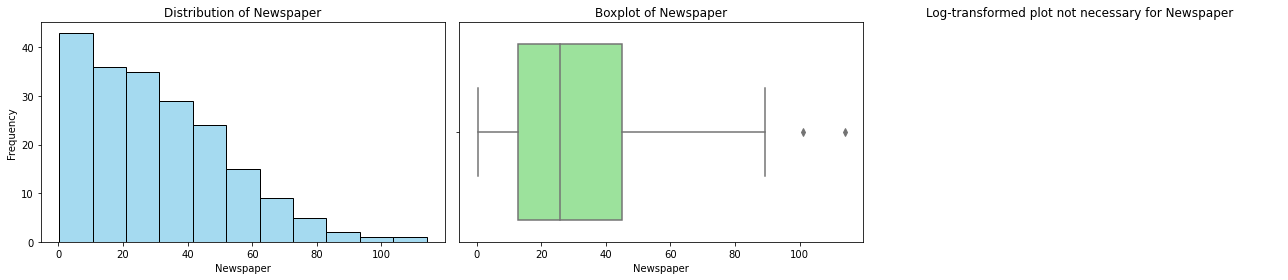

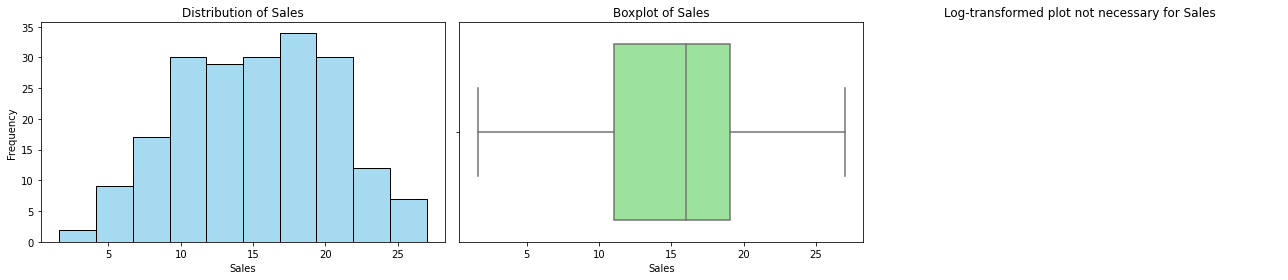

In [9]:
for column in numerical_columns:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))
    sns.histplot(df[column], kde=False, color='skyblue', ax=ax1)
    ax1.set_title(f'Distribution of {column}')
    ax1.set_ylabel('Frequency')
    sns.boxplot(x=df[column], color='lightgreen', ax=ax2)
    ax2.set_title(f'Boxplot of {column}')
    if df[column].skew() > 1:
        df[column+'_log'] = np.log1p(df[column])
        sns.histplot(df[column+'_log'], kde=False, color='orange', ax=ax3)
        ax3.set_title(f'Log-transformed Distribution of {column}')
    else:
        ax3.set_title(f'Log-transformed plot not necessary for {column}')
        ax3.axis('off')
    plt.tight_layout()
    plt.show()

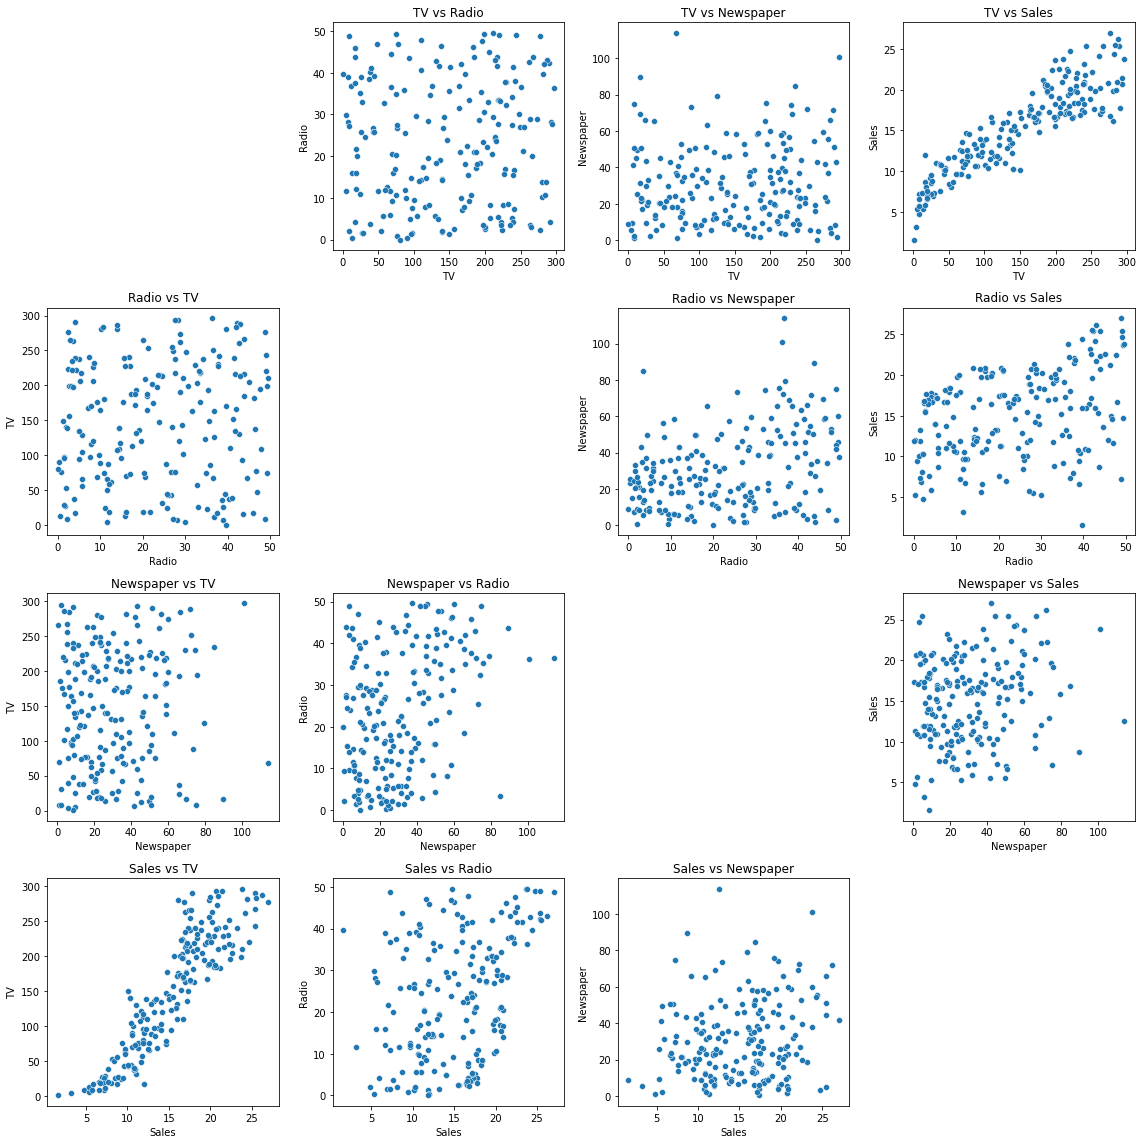

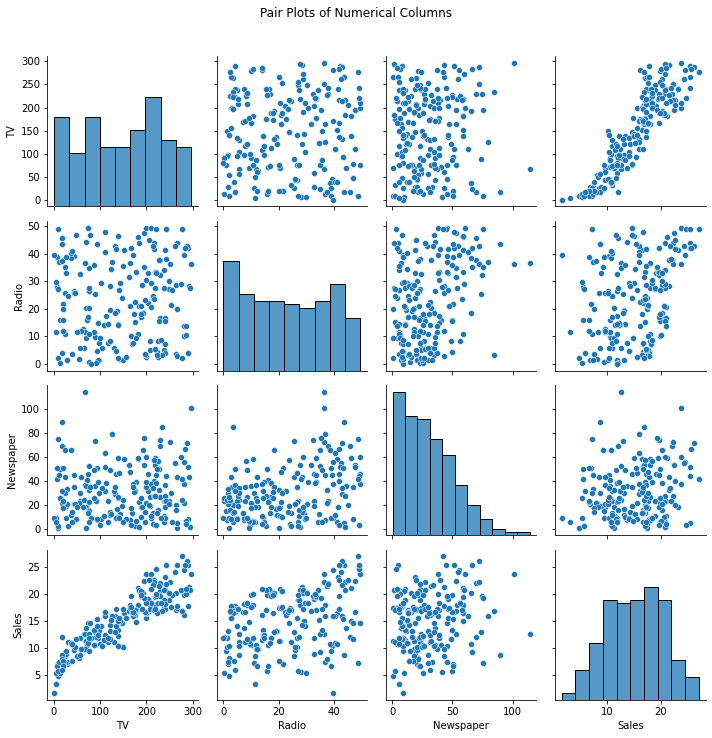

In [10]:
def scatter_plots(df, numerical_columns):
    num_cols = len(numerical_columns)
    fig, axes = plt.subplots(num_cols, num_cols, figsize=(16, 16))
    for i in range(num_cols):
        for j in range(num_cols):
            if i != j:
                sns.scatterplot(ax=axes[i, j], x=df[numerical_columns[i]], y=df[numerical_columns[j]])
                axes[i, j].set_title(f'{numerical_columns[i]} vs {numerical_columns[j]}')
                axes[i, j].set_xlabel(numerical_columns[i])
                axes[i, j].set_ylabel(numerical_columns[j])
            else:
                axes[i, j].axis('off')
    plt.tight_layout()
    plt.show()
def pair_plots(df, numerical_columns):
    pair_plot = sns.pairplot(df[numerical_columns])
    pair_plot.fig.suptitle('Pair Plots of Numerical Columns', y=1.02)
    plt.tight_layout()
    plt.show()
scatter_plots(df, numerical_columns)
pair_plots(df, numerical_columns)

In [11]:
df1=df

In [12]:
df1.shape

(200, 4)

In [13]:
y=df1['Sales']

In [14]:
x = df1.drop(['Sales'],axis=1)

In [15]:
print(df1.columns)

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1 = scaler.fit_transform(df1)

In [17]:
df1

array([[0.77578627, 0.76209677, 0.60598065, 0.80708661],
       [0.1481231 , 0.79233871, 0.39401935, 0.34645669],
       [0.0557998 , 0.92540323, 0.60686016, 0.40944882],
       [0.50997633, 0.83266129, 0.51187335, 0.58661417],
       [0.60906324, 0.21774194, 0.51099384, 0.64173228],
       [0.02705445, 0.9858871 , 0.65699208, 0.22047244],
       [0.19208657, 0.66129032, 0.20404573, 0.4015748 ],
       [0.4041258 , 0.39516129, 0.09938434, 0.45669291],
       [0.02671627, 0.04233871, 0.00615655, 0.12598425],
       [0.67331755, 0.05241935, 0.18381706, 0.5511811 ],
       [0.2211701 , 0.11693548, 0.21020229, 0.43307087],
       [0.72370646, 0.48387097, 0.03254178, 0.62204724],
       [0.07811972, 0.70766129, 0.5769569 , 0.2992126 ],
       [0.32735881, 0.15322581, 0.06068602, 0.47637795],
       [0.68785932, 0.66330645, 0.40193492, 0.68503937],
       [0.65843761, 0.96169355, 0.46262093, 0.81889764],
       [0.22691917, 0.73790323, 1.        , 0.42913386],
       [0.94927291, 0.7983871 ,

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
X_train

TV  Radio  Newspaper
79   116.0    7.7       23.1
197  177.0    9.3        6.4
38    43.1   26.7       35.1
24    62.3   12.6       18.3
122  224.0    2.4       15.6
..     ...    ...        ...
106   25.0   11.0       29.7
14   204.1   32.9       46.0
92   217.7   33.5       59.0
179  165.6   10.0       17.6
102  280.2   10.1       21.4

[160 rows x 3 columns]

In [20]:
y_train

79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
       ... 
106     7.2
14     19.0
92     19.4
179    17.6
102    19.8
Name: Sales, Length: 160, dtype: float64

In [21]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred_train = linear_reg.predict(X_train)
y_pred_test = linear_reg.predict(X_test)

In [23]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 2.6761426537826685
Testing MSE: 2.9077569102710896
Training R2 Score: 0.9001416005862131
Testing R2 Score: 0.9059011844150826


In [24]:
new_data = pd.DataFrame({'TV': [100], 'Radio': [50], 'Newspaper': [25]})
predicted_sales = linear_reg.predict(new_data)
print("Predicted Sales:", predicted_sales)

Predicted Sales: [15.32073778]


In [25]:
new_data = pd.DataFrame({'TV': [29], 'Radio': [75], 'Newspaper': [125]})
predicted_sales = linear_reg.predict(new_data)
print("Predicted Sales:", predicted_sales)

Predicted Sales: [14.40787829]


In [26]:
new_data = pd.DataFrame({'TV': [75], 'Radio': [55], 'Newspaper': [155]})
predicted_sales = linear_reg.predict(new_data)
print("Predicted Sales:", predicted_sales)

Predicted Sales: [15.0264969]
